In [1]:
%matplotlib inline

import numpy as np
import scipy.linalg as la
import scipy.interpolate as interp
import scipy.integrate as integrate
import matplotlib as mpl
import matplotlib.pyplot as plt
import sympy

default_dpi = mpl.rcParamsDefault['figure.dpi']
factor = 1
mpl.rcParams['figure.dpi'] = default_dpi * factor

In [29]:
# x(n), y(n) - массив данных
# m - степень полинома (количество базисных функций - 1)

def SqLeast (x, y, m):
    global G, Phi
    n = len(x)
    Phi = np.zeros ((n,m+1))
    for k in range (0, m+1):
        Phi[:,k] = BasicFunctions (k, x)
    PhiT = Phi.T
    G = PhiT @ Phi
    z = PhiT @ y
    a = np.linalg.solve(G, z)
    return a

def SqLeastReg (x, y, m, alpha):
    global G
    n = len(x)
    Phi = np.zeros ((n,m+1))
    for k in range (0, m+1):
        Phi[:,k] = BasicFunctions (k, x)
    PhiT = Phi.T
    
    RegAlpha = np.eye (m+1) * alpha

        
    G = PhiT @ Phi + RegAlpha 
    z = PhiT @ y
    a = np.linalg.solve(G, z)
    return a

def sql_least_robust(x,y,m,alpha=0.01):
    n = len(x)
    koef = np.zeros((n, m + 1))
    
    for i in range(0, m+1):
        koef[:, i ] = get_funct(i , x)
    dist = 1.5
    dist = dist
        
    koef_t = koef.T
    regAlpha = np.eye(m + 1) * alpha
    G = koef_t @ koef + regAlpha
    z = koef_t @ y
    a = np.linalg.solve(G,z)
    
    E = np.eye (n)
    yr = y @ E 
    
    eps = 0.001
    
    for i in range(10):
            
        ait = a  
          
        PhiA = Phi @ a
    
        res = Phi @ a - yr        
          
        for i in range (0, n):
            #print ('it*', it,  y[10], PhiA[i]-dist)
            if (res[i]>dist):
                yr[i] = PhiA[i]-dist
                #print ('it+', it,  y[10], PhiA[i]-dist)
            if (res[i]<-dist):
                yr[i] = PhiA[i]+dist
                #print ('it-', it,  y[10], PhiA[i]-dist)
                    
        z = koef_t @ yr
        a = np.linalg.solve(G, z)
        
        eit = a - ait
        epsit = (sum(eit**2))**0.5/len(eit)
        
        print ('iteration', i, a, epsit)
        
        if (epsit<=eps):
            print ()
            break 
                
    return a
        
        
    
    
    
    
    

def BasicFunctions (num, x):
    PhiFun = x**num
    return PhiFun

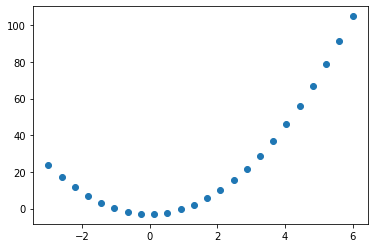

In [4]:
xleft = -3
xright = 6
n = 24
x = np.linspace(xleft,xright,n)
yf = np.zeros ((n))
y = np.zeros ((n))
yf = -3. + 3*x **2
plt.plot (x,yf, 'o')

80.0


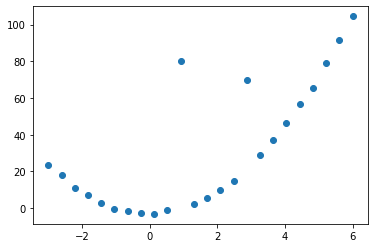

In [6]:
Delta = 0.5 * np.random.randn(len(x))
y = yf + Delta
y_av = np.sum(y)/len(x)

y [10] = 80.
y [15] = 70.

plt.plot (x, y, 'o')

print (y[10])

### Построим аппроксимационный полином

Можем видеть, что две точки портят аппроксимацию

Коэффициенты [6.30149344 2.55540842 2.1852899 ]
Числа обусловленности матриц G и Phi 402.0262201187212 20.05059151543223


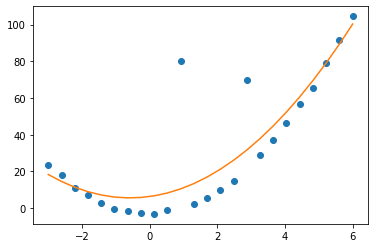

In [16]:
m = 2

PolynomCoefs = SqLeast (x, y, m)
print ('Коэффициенты', PolynomCoefs)

cond = np.linalg.cond (G)
condPhi = np.linalg.cond (Phi)
EigG = np.linalg.eigvals (G)
print ('Числа обусловленности матриц G и Phi', cond, condPhi)

PolynomValue = np.zeros(len(x))
for i in range (0, m+1):
    PolynomValue += PolynomCoefs[i]*x**i
    
plt.plot (x, y, 'o')
plt.plot (x, PolynomValue)

### Робастная аппроксимация

In [19]:
def get_funct(degree, val):
    return val ** degree

iteration 23 [5.0535831  2.2415441  2.29732967] 0.42884894908031335
iteration 23 [4.86739549 2.18808319 2.31357299] 0.06479689594674191
iteration 23 [4.83768631 2.17942512 2.31617073] 0.01035130776025979
iteration 23 [4.83291858 2.17803415 2.31658769] 0.0016613212584358503
iteration 23 [4.83215313 2.17781082 2.31665463] 0.00026672333458040354

Коэффициенты [4.83215313 2.17781082 2.31665463]
Числа обусловленности матриц G и Phi 402.0262201187212 20.05059151543223


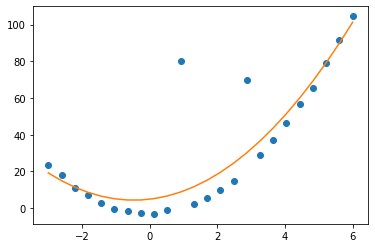

In [30]:
m = 2

PolynomCoefs = sql_least_robust (x, y, m)
print ('Коэффициенты', PolynomCoefs)

cond = np.linalg.cond (G)
condPhi = np.linalg.cond (Phi)
EigG = np.linalg.eigvals (G)
print ('Числа обусловленности матриц G и Phi', cond, condPhi)

PolynomValue = np.zeros(len(x))

for i in range (0, m+1):
    PolynomValue += PolynomCoefs[i]*x**i
    
plt.plot (x, y, 'o')
plt.plot (x, PolynomValue)

Робастная регуляризация проявила себя лучше